<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction to Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./../data/processed.csv')
data

,Name,Released year,Genre,Director,Runtime (h),Score,Status,Language,Budget ($),Revenue ($)
0,Fast X,2023,"'Action', 'Crime', 'Thriller'",Dan Mazeau,2.37,72.0,Released,English,340000000.0,704709660.0
1,Trolls Band Together,2023,"'Animation', 'Family', 'Music', 'Fantasy', 'Co...",Thomas Dam,1.53,72.0,Released,English,95000000.0,173800000.0
2,Robot Apocalypse,2021,"'Science Fiction', 'Action'",Marcus Friedlander,1.45,21.0,Released,English,NaN,NaN
3,Five Nights at Freddy's,2023,"'Horror', 'Mystery'",Emma Tammi,1.83,78.0,Released,English,20000000.0,286700000.0
4,Oppenheimer,2023,"'Drama', 'History'",Christopher Nolan,3.02,81.0,Released,English,100000000.0,951000000.0
...,...,...,...,...,...,...,...,...,...,...
4995,Secret in Their Eyes,2015,"'Thriller', 'Mystery', 'Drama', 'Crime'",Billy Ray,1.85,64.0,Released,English,19500000.0,34854990.0
4996,The Vatican Tapes,2015,"'Thriller', 'Horror'",Mark Neveldine,1.52,53.0,Released,English,13000000.0,1784763.0
4997,Song to Song,2017,"'Romance', 'Drama', 'Music'",Terrence Malick,2.15,55.0,Released,English,10000000.0,1710528.0
4998,Divine Intervention,2023,'Comedy',Pedro Pablo Ibarra,1.67,82.0,Released,Spanish; Castilian,NaN,NaN


# Question: Does a movie with high scores tend to have high revenue?

## Step 0: Benefit

- Consider the impact of scores on movie revenue
- Determine the impact of scores on revenue so filmmakers know the important factors that help them increase revenue

## Step 1: Preprocessing

In [3]:
df = data[['Name', 'Score', 'Revenue ($)']]
df = df[df['Revenue ($)'].notna()]
df

,Name,Score,Revenue ($)
0,Fast X,72.0,704709660.0
1,Trolls Band Together,72.0,173800000.0
3,Five Nights at Freddy's,78.0,286700000.0
4,Oppenheimer,81.0,951000000.0
7,Freelance,65.0,8000000.0
...,...,...,...
4992,Tucker: The Man and His Dream,67.0,19652638.0
4994,Who Am I,76.0,7700259.0
4995,Secret in Their Eyes,64.0,34854990.0
4996,The Vatican Tapes,53.0,1784763.0


## Step 2: Visualization

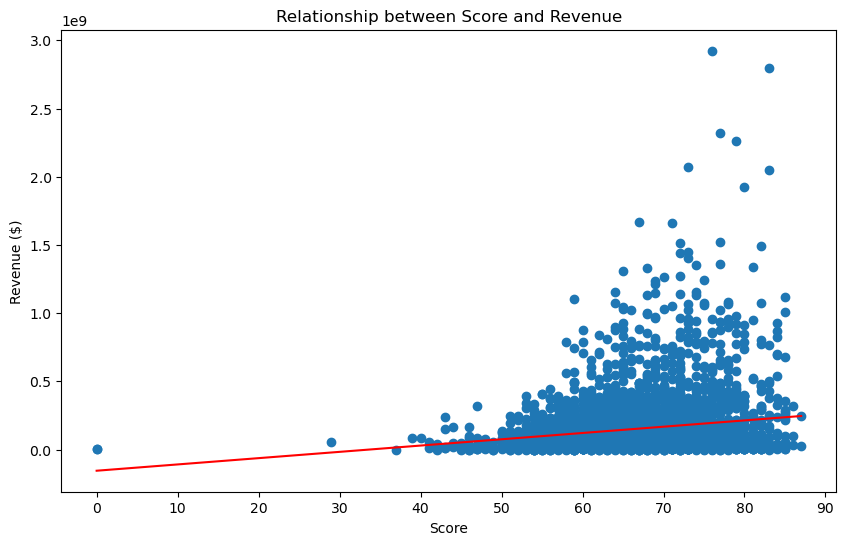

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Score'], df['Revenue ($)'])

coefs = np.polyfit(df['Score'], df['Revenue ($)'], 1)
line = np.poly1d(coefs)
x = np.linspace(df['Score'].min(), df['Score'].max(), 100)
plt.plot(x, line(x), color='red')

plt.xlabel('Score')
plt.xticks(range(int(df['Score'].min()), int(df['Score'].max()) + 10, 10))
plt.ylabel('Revenue ($)')
plt.title('Relationship between Score and Revenue')

plt.show()

## Step 3: Answer

- Based on the scatter plot, the upward regression line shows a positive relationship between score and revenue
- However, the regression line just points slightly upward and the scattered points are concentrated in the lower right corner of the plot
#### We see that the highest revenues of movie are up to 3 billion dollars. However, only a few movies with high scores have high revenues. There are many movies with revenues under 1 billion dollars and scores from 40 to 90, but the majority of films have a revenue of less than 500 million dollars

#### => Scores are not an important factor affecting movie revenue because movies with scores as high as 90 also have revenues mostly under 1 billion dollars but movies with scores around 40 also have similar revenues.